# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from thermolib.thermodynamics.fep import BaseFreeEnergyProfile, plot_feps
from thermolib.thermodynamics.histogram import Histogram1D,plot_histograms
from thermolib.tools import read_wham_input
from thermolib.thermodynamics.bias import PlumedSplinePotential1D

import numpy as np, matplotlib.pyplot as pp

from molmod.units import *

# WHAM with an additional external potential

The additional external potential is added on top of each simulation specific potential and is defined as a spline-interpolated potential that is read from PLUMED file.

We first define the external potential

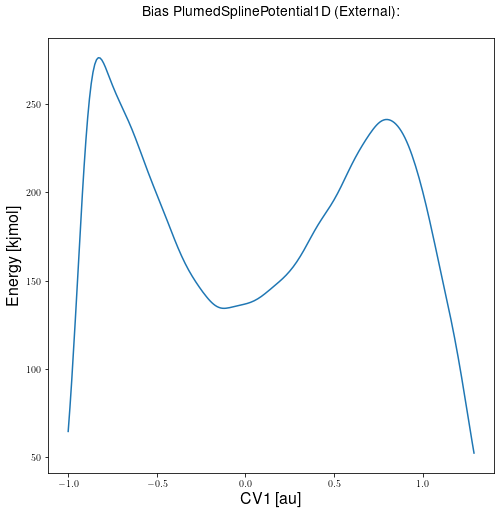

In [3]:
fn_spline = '/home/louis/hpc/data/shared/massimo/for_Louis/external/external.grid'
bias_spline = PlumedSplinePotential1D('External', fn_spline, inverse_cv=False, unit='kjmol', scale=1.0)
bias_spline.plot('ext_bias.png', np.arange(-1.0,1.3,0.01))

Next we read all umbrellas and specify the above defined potential through the argument 'additional_bias' of the read_wham_input routine.

In [4]:
#read temperature and bias potentials from wham_input.txt file
fn = '/home/louis/hpc/data/shared/massimo/for_Louis/external/wham_input.txt'
temp, biasses, trajectories = read_wham_input(fn, path_template_colvar_fns='colvar_%s.dat', kappa_unit='kjmol', additional_bias=bias_spline, verbose=True)

Temperature set at 523.000000
Added bias MultipleBiasses1D (MultipleBias): MultipleBias:
  Parabola1D (U1): K=500 kjmol  q0=-8.000e-01 au
  PlumedSplinePotential1D (External): 

Read corresponding trajectory data from /home/louis/hpc/data/shared/massimo/for_Louis/external/colvar_U1.dat
Added bias MultipleBiasses1D (MultipleBias): MultipleBias:
  Parabola1D (U2): K=750 kjmol  q0=-6.000e-01 au
  PlumedSplinePotential1D (External): 

Read corresponding trajectory data from /home/louis/hpc/data/shared/massimo/for_Louis/external/colvar_U2.dat
Added bias MultipleBiasses1D (MultipleBias): MultipleBias:
  Parabola1D (U3): K=750 kjmol  q0=-4.000e-01 au
  PlumedSplinePotential1D (External): 

Read corresponding trajectory data from /home/louis/hpc/data/shared/massimo/for_Louis/external/colvar_U3.dat
Added bias MultipleBiasses1D (MultipleBias): MultipleBias:
  Parabola1D (U4): K=750 kjmol  q0=-2.000e-01 au
  PlumedSplinePotential1D (External): 

Read corresponding trajectory data from /home/louis

Now we perform WHAM and plot the results

In [5]:
bins = np.arange(-1.0, 1.3, 0.02)
hist = Histogram1D.from_wham(bins, trajectories, biasses, temp, error_estimate='mle_f', Nscf=1000, convergence=1e-6, verbose=False)

WHAM SCF Converged!


<Figure size 432x288 with 0 Axes>

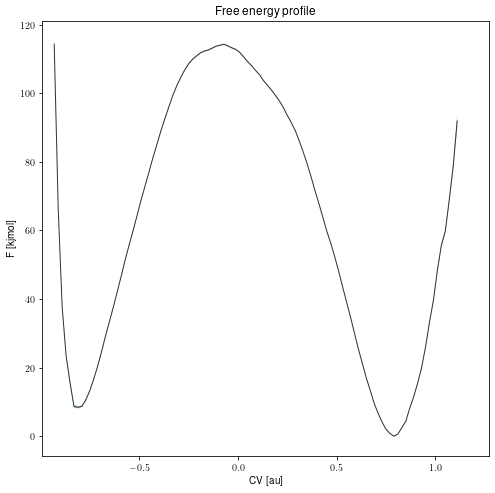

In [6]:
fep = BaseFreeEnergyProfile.from_histogram(hist, temp=temp)
fep.set_ref(ref='min')
fep.plot('fep.png')